# **Tarea 2** - Taller de Python para Ciencia de Datos

## Objetivos
Desarrollar una aplicación en Jupyter Notebook que muestre una historia del proceso de preparación
y visualización de datos para su posterior análisis, utilizando las herramientas que provee el lenguaje
de programación Python a través de las bibliotecas vistas en clases (Numpy, Pandas y Matplotlib).
La aplicación a desarrollar debe considerar los siguientes ítems.

## Tabla de contenidos
1. [Adquisición de datos](#0)
2. [Utilizar los métodos pandas.read_xxx() y pandas.to_xxx()](#1)
3. [Revisión encabezado de datos de entrada](#2)
4. [Análisis de los datos de entrada con *.describe()* y *.info()*](#3)
5. [Identificación y manipulación de valores faltantes](#4)
    - [Identificar valores faltantes](#41)
    - [Manipulación de datos faltantes](#42)
    - [Corregir el formato de los datos](#43)
6. [Estandarización de los datos](#5)
7. [Normalización de los datos](#6)
8. [Agrupar datos de entrada](#7)
9. [Generar variables indicadoras](#8)
10. [Guardado de datos](#9)
11. [Generación de gráficos](#graficos)
    - [Género de pelicula mas común](#graficos-frecuencia)
    - [Distribución peliculas por época de lanzamiento](#graficos-circular)
    - [Duración de Películas por Época y Año de Lanzamiento](#graficos-lineas)
    - [Recaudación de películas por año](#graficos-recaudacion)

## Adquisición de datos  <a id="0"></a>

- Para la siguiente tarea se utilizaran dos conjuntos de datos distintos. A continucacion se da a conocer el tipo de dato al cual corresponde cada conjunto:

- Tipo de datos de FortniteStatistics: csv
- Tipo de datos de imdb_top_2000_movies: csv

Para trabajar con estos datos el primer paso es importar la librerias pandas y numpy.

In [506]:
import pandas as pd
import numpy as np

## Limpieza y formateo de datos 


### 1. Utilizar los métodos pandas.read_xxx() y pandas.to_xxx() para leer y guardar los datos.<a id="1"></a>


In [507]:
# Lee el archivo de entrada mediante pandas y lo asigna a la variable "df"

ubicacion = "./datos/imdb_top_2000_movies.csv"
df = pd.read_csv(ubicacion, header=None)

In [508]:
# Muestra las primeras 10 filas usando el método dataframe.head()

print("Las primeras 5 filas del dataframe") 
df.head(20)

Las primeras 5 filas del dataframe


,0,1,2,3,4,5,6,7,8,9
0,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
1,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
2,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
3,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
4,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
5,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
6,Close Encounters of the Third Kind,1977,138,7.6,90.0,"216,050","Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,$132.09M
7,Once Upon a Time in the West,1968,166,8.5,82.0,"348,110",Western,Sergio Leone,Henry Fonda,$5.32M
8,The Dirty Dozen,1967,150,7.7,73.0,"78,858","Action, Adventure, War",Robert Aldrich,Lee Marvin,$45.30M
9,Rosemary's Baby,1968,137,8.0,96.0,"234,034","Drama, Horror",Roman Polanski,Mia Farrow,NaN


### 2. Revisar si los datos de entrada tienen o no un encabezado. De no ser así, corregir esta situación.<a id="2"></a>





In [509]:
# Crea una lista con el encabezado

encabezado = ["Movie Name","Release Year","Duration","IMDB Rating", "Metascore","Votes","Genre","Director","Cast","Gross($M)"]
print("headers\n", encabezado)

headers
 ['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Genre', 'Director', 'Cast', 'Gross($M)']


In [510]:
# Se reemplaza el encabezado y se verifica que todo funcionó correctamente

df.columns = encabezado
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross($M)
0,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
1,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
2,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
3,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
4,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M


### Se procede a la eliminación de la fila 0
Esto se realiza para una mejor visualización de los datos con los que se trabajaran

In [511]:
# Se elimina la fila 0 la cual tenía los nombres de los encabezados
df = df.drop(0) 

### 3. Realizar un análisis básico de los datos de entrada con los métodos .describe() y .info().<a id="3"></a>

In [512]:
df.describe(include = "all")

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross($M)
count,2000,2000,2000,2000,1919,2000,2000,2000,2000,1903
unique,1981,112,131,66,89,1991,264,918,919,1721
top,The Omen,2007,104,7.2,73.0,"101,547","Comedy, Drama, Romance",Steven Spielberg,Tom Cruise,$0.02M
freq,2,123,53,103,51,2,98,22,23,7


In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 1 to 2000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Name    2000 non-null   object
 1   Release Year  2000 non-null   object
 2   Duration      2000 non-null   object
 3   IMDB Rating   2000 non-null   object
 4   Metascore     1919 non-null   object
 5   Votes         2000 non-null   object
 6   Genre         2000 non-null   object
 7   Director      2000 non-null   object
 8   Cast          2000 non-null   object
 9   Gross($M)     1903 non-null   object
dtypes: object(10)
memory usage: 156.4+ KB


### 4. Identificar y manipular valores faltantes.<a id="4"></a>



#### a) Identificar valores faltantes.<a id="41"></a>

In [514]:
# Se evaluan los valores faltantes reemplazando los NaN por TRUE 

datos_faltantes = df.isnull()
datos_faltantes.head(20)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross($M)
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True
10,False,False,False,False,False,False,False,False,False,False


In [515]:
# Se contaran los valores faltantes en cada columna 

for columna in datos_faltantes.columns.values.tolist():
    print('columna:',columna)
    print (datos_faltantes[columna].value_counts())
    print("") 

columna: Movie Name
False    2000
Name: Movie Name, dtype: int64

columna: Release Year
False    2000
Name: Release Year, dtype: int64

columna: Duration
False    2000
Name: Duration, dtype: int64

columna: IMDB Rating
False    2000
Name: IMDB Rating, dtype: int64

columna: Metascore
False    1919
True       81
Name: Metascore, dtype: int64

columna: Votes
False    2000
Name: Votes, dtype: int64

columna: Genre
False    2000
Name: Genre, dtype: int64

columna: Director
False    2000
Name: Director, dtype: int64

columna: Cast
False    2000
Name: Cast, dtype: int64

columna: Gross($M)
False    1903
True       97
Name: Gross($M), dtype: int64



Basado en el resumen anterior, cada columna tiene 2000 filas de datos y 2 columnas tienen datos faltantes.

1. "Metascore": 81 datos faltantes
2. "Gross": 97 datos faltantes


#### b) Manipular valores faltantes.<a id="42"></a>


In [516]:
# Se calcula el valor promedio de la columna Metascore

metascore_pro = df["Metascore"].astype("float").mean(axis=0)
print("Promedio de Metascore:", metascore_pro)

Promedio de Metascore: 61.04429390307452


In [517]:
# Se reemplazaran los valores NaN, con el valor promedio en la columna "Metascore"

df["Metascore"].replace(np.nan, metascore_pro, inplace=True)

#### Descarte de fila completa por Gross

La razón del descarte de las filas con datos faltantes es que la columna Gross es lo que se quiere llegar a predecir.

In [518]:
# Se eliminan todas las filas con NaN en la columna "Gross"
df.dropna(subset=["Gross($M)"], axis=0, inplace=True)

# Se reinician los indices ya que se han eliminado 97 filas
df.reset_index(drop=True, inplace=True)

In [519]:
df.head(20)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross($M)
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Close Encounters of the Third Kind,1977,138,7.6,90.0,"216,050","Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,$132.09M
5,Once Upon a Time in the West,1968,166,8.5,82.0,"348,110",Western,Sergio Leone,Henry Fonda,$5.32M
6,The Dirty Dozen,1967,150,7.7,73.0,"78,858","Action, Adventure, War",Robert Aldrich,Lee Marvin,$45.30M
7,Cabaret,1972,124,7.8,80.0,"59,119","Drama, Music, Musical",Bob Fosse,Liza Minnelli,$42.77M
8,Psycho,1960,109,8.5,97.0,"715,718","Horror, Mystery, Thriller",Alfred Hitchcock,Anthony Perkins,$32.00M
9,Rebecca,1940,130,8.1,86.0,"146,211","Drama, Mystery, Romance",Alfred Hitchcock,Laurence Olivier,$4.36M


##### c) Corregir el formato de los datos<a id="43"></a>

In [520]:
# Se modifican las columnas sacando caracteres que puedan interferir con el proceso de convertido a ciertos tipos
df['Release Year'] = df['Release Year'].str.replace('^(I |II )', '', regex=True).str.strip()
df['Gross($M)'] = df['Gross($M)'].str.replace(r'\$', '', regex=True).str.replace('M', '', regex=True)
df['Votes'] = df['Votes'].str.replace(',', '')


In [521]:
#se reemplazan los tipos de datos 
df[["Gross($M)"]] = df[["Gross($M)"]].astype("float")
df[["Release Year", "Duration"]] = df[["Release Year", "Duration"]].astype(int)
df[["Metascore","Votes"]] = df[["Metascore","Votes"]].astype(float).astype(int)

df.dtypes

Movie Name       object
Release Year      int32
Duration          int32
IMDB Rating      object
Metascore         int32
Votes             int32
Genre            object
Director         object
Cast             object
Gross($M)       float64
dtype: object

### 5. Estandarizar datos de entrada.<a id="5"></a>

La base de datos de películas obtenida fue recolectada por IMDB. Al ser una página de origen estadounidense, la moneda usada para medir la recaudación de cada película es dólares (USD), por lo que se estandarizará estos valores a pesos chilenos (CLP). Para esto llamaremos una API para obtener el valor del dólar actualizado.

In [522]:
import requests
import json
response_API = requests.get('https://api.exchangerate-api.com/v4/latest/usd')
data = response_API.text
parse_json = json.loads(data)
usd_to_clp = parse_json['rates']['CLP']

A continuación, se realiza la conversión que, al estar en millones de dólares, el resultado al pasarlo a pesos chilenos queda un valor muy grande por lo que se redondeará para que se muestre el valor de recaudación en miles de millones de pesos chilenos. Finalmente se renombra la columna para Gross para reflejar este cambio.

In [523]:
df["Gross($M)"] *= usd_to_clp
df["Gross($M)"] *= 0.001
df["Gross($M)"] = np.round(df["Gross($M)"],2)
df.rename(columns = {"Gross($M)":"Gross(CLP$MM)"}, inplace = True)
df.head(20)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross(CLP$MM)
0,The Godfather,1972,175,9.2,100,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,126.53
1,The Godfather Part II,1974,202,9.0,90,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,53.72
2,Ordinary People,1980,124,7.7,86,56476,Drama,Robert Redford,Donald Sutherland,51.37
3,Lawrence of Arabia,1962,218,8.3,100,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,42.02
4,Close Encounters of the Third Kind,1977,138,7.6,90,216050,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,123.83
5,Once Upon a Time in the West,1968,166,8.5,82,348110,Western,Sergio Leone,Henry Fonda,4.99
6,The Dirty Dozen,1967,150,7.7,73,78858,"Action, Adventure, War",Robert Aldrich,Lee Marvin,42.47
7,Cabaret,1972,124,7.8,80,59119,"Drama, Music, Musical",Bob Fosse,Liza Minnelli,40.09
8,Psycho,1960,109,8.5,97,715718,"Horror, Mystery, Thriller",Alfred Hitchcock,Anthony Perkins,30.00
9,Rebecca,1940,130,8.1,86,146211,"Drama, Mystery, Romance",Alfred Hitchcock,Laurence Olivier,4.09


### 6. Normalizar datos de entrada.<a id="6"></a>


Se procede a normalizar la columna `Metascore` en relación a la columna `IMDB Rating`, dado que ambas indican una valorización de las películas

In [524]:
#Se estandariza el Metascore en relación al IMBD rating
df['Metascore'] = df['Metascore']/10

df.head(20)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross(CLP$MM)
0,The Godfather,1972,175,9.2,10.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,126.53
1,The Godfather Part II,1974,202,9.0,9.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,53.72
2,Ordinary People,1980,124,7.7,8.6,56476,Drama,Robert Redford,Donald Sutherland,51.37
3,Lawrence of Arabia,1962,218,8.3,10.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,42.02
4,Close Encounters of the Third Kind,1977,138,7.6,9.0,216050,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,123.83
5,Once Upon a Time in the West,1968,166,8.5,8.2,348110,Western,Sergio Leone,Henry Fonda,4.99
6,The Dirty Dozen,1967,150,7.7,7.3,78858,"Action, Adventure, War",Robert Aldrich,Lee Marvin,42.47
7,Cabaret,1972,124,7.8,8.0,59119,"Drama, Music, Musical",Bob Fosse,Liza Minnelli,40.09
8,Psycho,1960,109,8.5,9.7,715718,"Horror, Mystery, Thriller",Alfred Hitchcock,Anthony Perkins,30.00
9,Rebecca,1940,130,8.1,8.6,146211,"Drama, Mystery, Romance",Alfred Hitchcock,Laurence Olivier,4.09


### 7. Agrupar datos de entrada.<a id="7"></a>

In [525]:
# Define los límites
limites = [1920, 1960, 2000, 2011]  

In [526]:
# Se crea los nombres para los 5 grupos de años
nombres_de_grupo = ['Antiguo', 'Retro', 'Moderno'] 

In [527]:
#df['Release Year Grouped'] = pd.cut(df['Release Year'], contenedores, labels=nombres_de_grupo, include_lowest=True )
df['Release Year Grouped'] = pd.cut(df['Release Year'], bins=limites, labels=nombres_de_grupo, right=False)
df[['Release Year','Release Year Grouped']].head(10)

,Release Year,Release Year Grouped
0,1972,Retro
1,1974,Retro
2,1980,Retro
3,1962,Retro
4,1977,Retro
5,1968,Retro
6,1967,Retro
7,1972,Retro
8,1960,Retro
9,1940,Antiguo


In [528]:
# Verificación de la división de grupos
df["Release Year Grouped"].value_counts()

Moderno    1065
Retro       785
Antiguo      53
Name: Release Year Grouped, dtype: int64

### 8. Generar variables indicadoras.<a id="8"></a>

In [529]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross(CLP$MM),Release Year Grouped
0,The Godfather,1972,175,9.2,10.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,126.53,Retro
1,The Godfather Part II,1974,202,9.0,9.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,53.72,Retro
2,Ordinary People,1980,124,7.7,8.6,56476,Drama,Robert Redford,Donald Sutherland,51.37,Retro
3,Lawrence of Arabia,1962,218,8.3,10.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,42.02,Retro
4,Close Encounters of the Third Kind,1977,138,7.6,9.0,216050,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,123.83,Retro


In [530]:
variable_indicadora = pd.get_dummies(df["Release Year Grouped"])
variable_indicadora.head()

,Antiguo,Retro,Moderno
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [531]:
variable_indicadora.rename(columns={'Antiguo':'Release Year Grouped (Antiguo)', 'Retro':'Release Year Grouped (Retro)','Moderno':'Release Year Grouped (Moderno)'}, inplace=True)
variable_indicadora.head()

,Release Year Grouped (Antiguo),Release Year Grouped (Retro),Release Year Grouped (Moderno)
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [532]:
# Se combinan los dataframes "df" y "variable_indicadora" 
df = pd.concat([df, variable_indicadora], axis=1)

In [533]:
df.head(20)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross(CLP$MM),Release Year Grouped,Release Year Grouped (Antiguo),Release Year Grouped (Retro),Release Year Grouped (Moderno)
0,The Godfather,1972,175,9.2,10.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,126.53,Retro,0,1,0
1,The Godfather Part II,1974,202,9.0,9.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,53.72,Retro,0,1,0
2,Ordinary People,1980,124,7.7,8.6,56476,Drama,Robert Redford,Donald Sutherland,51.37,Retro,0,1,0
3,Lawrence of Arabia,1962,218,8.3,10.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,42.02,Retro,0,1,0
4,Close Encounters of the Third Kind,1977,138,7.6,9.0,216050,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,123.83,Retro,0,1,0
5,Once Upon a Time in the West,1968,166,8.5,8.2,348110,Western,Sergio Leone,Henry Fonda,4.99,Retro,0,1,0
6,The Dirty Dozen,1967,150,7.7,7.3,78858,"Action, Adventure, War",Robert Aldrich,Lee Marvin,42.47,Retro,0,1,0
7,Cabaret,1972,124,7.8,8.0,59119,"Drama, Music, Musical",Bob Fosse,Liza Minnelli,40.09,Retro,0,1,0
8,Psycho,1960,109,8.5,9.7,715718,"Horror, Mystery, Thriller",Alfred Hitchcock,Anthony Perkins,30.00,Retro,0,1,0
9,Rebecca,1940,130,8.1,8.6,146211,"Drama, Mystery, Romance",Alfred Hitchcock,Laurence Olivier,4.09,Antiguo,1,0,0


### 9. Guardar un conjunto de datos<a id="9"></a>

Se utiliza la biblioteca **Pandas**, con el método `dataframe.to_csv()` para el guardado del dataframe.



In [534]:
# Se guarda el dataframe ya tratado en la carpeta salida , con el mismo nombre pero añadiendo la palabra "limpio".
df.to_csv("./salida/imdb_top_2000_movies_limpio.csv", index=False)

## Generación de los gráficos.<a id="graficos"></a>

Para la generación de los gráficos primero se importará matplotlib que ayudará a crear la mayoría de gráficos.

In [535]:
import matplotlib.pyplot as plt


### 1. Género más común.<a id="graficos-frecuencia"></a>

Primero se instalan e importan las bibliotecas necesarias para generar una nube de palabras. Además, se descargan las palabras de parada (stopwords) de NLTK para su uso en el proceso de generación de la nube de palabras.

In [536]:
# Instalar wordcloud
!pip3 install wordcloud

# Instalar NLTK
!pip3 install NLTK

# Importar los paquetes y su conjunto de stop words
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

print ('Wordcloud  y NLTK están instalados e importados!')

Wordcloud  y NLTK están instalados e importados!


[nltk_data] Downloading package stopwords to C:\Users\Jose Rivas
[nltk_data]     Espinoza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Luego se calcula la frecuencia de cada género de película en el conjunto de datos. Luego, se utiliza esta información para generar una nube de palabras con la biblioteca WordCloud.

Entre los géneros más frecuentes se encuentran Drama, Comedia y Acción.

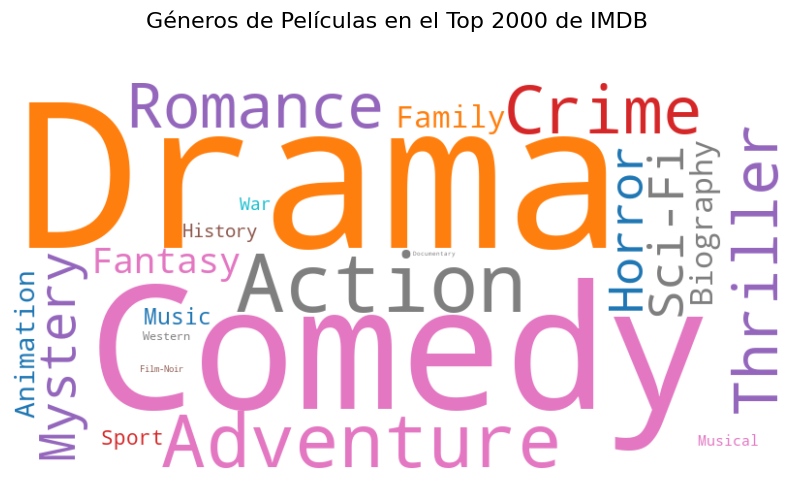

In [537]:
# Obtener la frecuencia de cada género
genero_frecuencia = df['Genre'].str.split(', ', expand=True).stack().value_counts()

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate_from_frequencies(genero_frecuencia)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Géneros de Películas en el Top 2000 de IMDB', fontsize=16, pad=40)
plt.axis('off')
plt.show()

### 2. Distribución de películas por época de lanzamiento<a id="graficos-circular"></a>

Se agrupan las películas por año de lanzamiento y se cuentan cuántas películas hay en cada año. Luego, se crea un gráfico de pastel para visualizar la distribución de películas por época de lanzamiento del conjunto de datos. El gráfico tiene un tamaño específico y se utiliza una paleta de colores predefinida. Se agregan etiquetas con el porcentaje de cada categoría.

El gráfico indíca que la época con menor cantidad de películas es entre 1920 y 1960, por lo que se explotó en el gráfico para resaltar mejor.

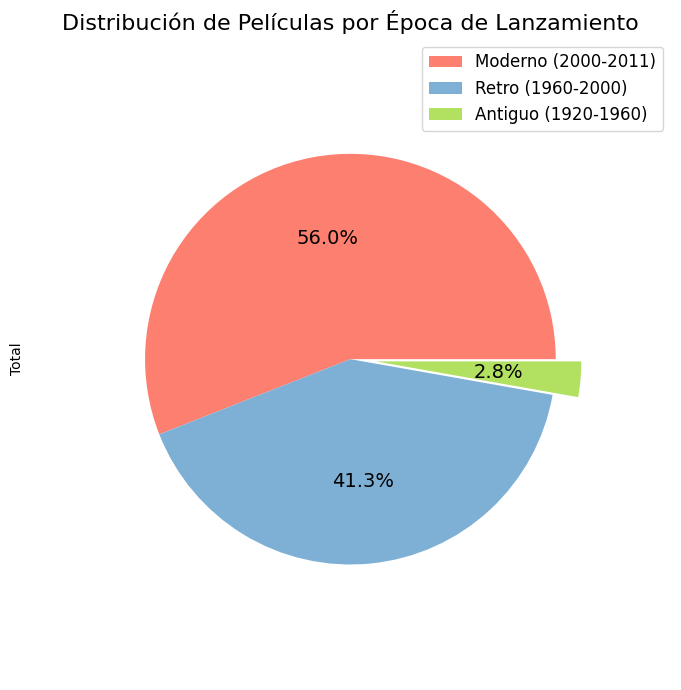

In [538]:
# Agrupar por año de lanzamiento y contar el número de películas en cada año
grupo_por_año = df['Release Year Grouped'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))  # Definir el tamaño del gráfico

# Set de colores
colores = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# Crear el gráfico de pastel
grupo_por_año.plot(kind='pie', 
                   colors=colores, 
                   autopct='%1.1f%%', 
                   labels=None, 
                   fontsize=14, 
                   explode=(0, 0, 0.1),
                   radius=0.8)

# Agregar título
plt.title('Distribución de Películas por Época de Lanzamiento', fontsize=16)
plt.ylabel('Total')

# Añadir leyenda
legend_labels = ['Moderno (2000-2011)','Retro (1960-2000)','Antiguo (1920-1960)']
plt.legend(legend_labels, loc='best', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

### 3. Duración de Películas por Época y Año de Lanzamiento<a id="graficos-lineas"></a>

Primero se filtra el conjunto de datos para crear tres separados, cada uno correspondiente a una época diferente: antigua (1920-1960), retro (1960-2000) y moderna (2000-2011), usando las variables indicadoras creadas.

Luego, crea una figura y tres subgráficos (uno para cada época) utilizando plt.subplots(). Cada subgráfico muestra la duración promedio de las películas a lo largo de los años para su respectiva época.

Se utiliza groupby() para calcular la duración promedio de las películas por año en cada época, y luego se trazan estas medias en los subgráficos con diferentes colores y marcadores para distinguir entre las épocas.

Se puede observar que en la época antigua las duración de las películas es bien errática sin tener un formato bien definido, luego desde los 60 a los 80 se llega a sobrepasar los 160 minutos, de los 80 a los 2000 se empieza a concretar en alrededor de 120, y finalmente las últimas películas se han estrenado con duraciones de alrededor de 110 minutos.

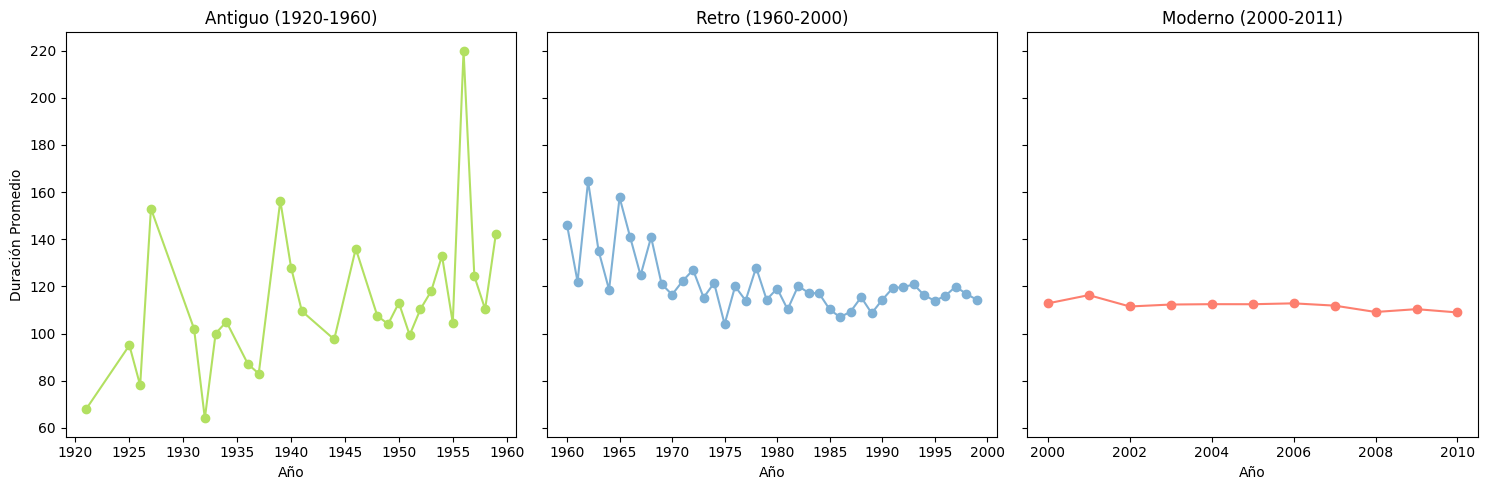

In [539]:
# Filtrar para cada época
df_antiguo = df[df['Release Year Grouped (Antiguo)'] == True]
df_retro = df[df['Release Year Grouped (Retro)'] == True]
df_moderno = df[df['Release Year Grouped (Moderno)'] == True]

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Subgráfico para la época antigua
antiguo_avg_duration = df_antiguo.groupby('Release Year')['Duration'].mean()
axs[0].plot(antiguo_avg_duration.index, antiguo_avg_duration.values, color=colores[2], marker='o')
axs[0].set_title('Antiguo (1920-1960)')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Duración Promedio')

# Subgráfico para la época retro
retro_avg_duration = df_retro.groupby('Release Year')['Duration'].mean()
axs[1].plot(retro_avg_duration.index, retro_avg_duration.values, color=colores[1], marker='o')
axs[1].set_title('Retro (1960-2000)')
axs[1].set_xlabel('Año')

# Subgráfico para la época moderna
moderno_avg_duration = df_moderno.groupby('Release Year')['Duration'].mean()
axs[2].plot(moderno_avg_duration.index, moderno_avg_duration.values, color=colores[0], marker='o')
axs[2].set_title('Moderno (2000-2011)')
axs[2].set_xlabel('Año')

# Mostrar gráfico
plt.tight_layout()
plt.show()

### 4. Recaudación de Películas por Año de Lanzamiento<a id="graficos-recaudacion"></a>

Este código primero agrupa las películas por año de lanzamiento y calcula el promedio de la recaudación (en millones de pesos chilenos) para cada año. Luego, encuentra el año con la mayor recaudación promedio.

Se genera un gráfico de líneas que muestra la recaudación promedio de las películas en el eje **Y** y el año de lanzamiento en el eje **X**. Luego se añade un título y etiquetas de ejes para mayor claridad. Además, se agrega una anotación que muestra el año con la mayor recaudación promedio y la cantidad correspondiente en el gráfico.

Tras posterior análisis se concreto que la película que marca el pico más grande en el gráfico es *Blancanieves y los siete enanitos* por lo que se agregó esta observación a la anotación.

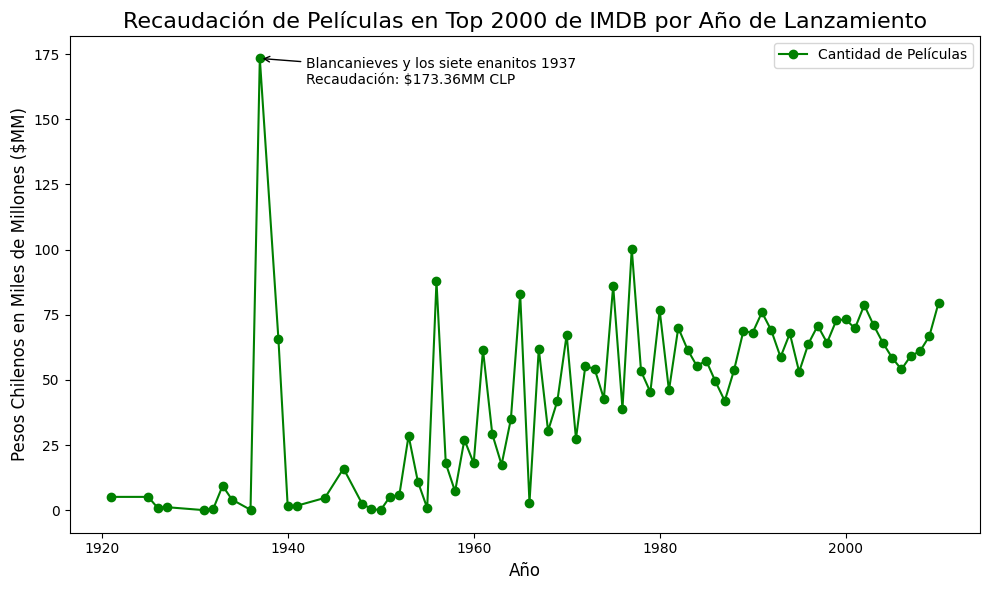

In [540]:
# Agrupar por año de lanzamiento y calcular promedio de recaudación
grupo_por_año = df.groupby("Release Year")["Gross(CLP$MM)"].mean()

# Obtener el año con mas películas
año_max = grupo_por_año.idxmax()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Color
color = "green"

# Crear el gráfico de líneas
grupo_por_año.plot(kind='line', color=color, marker='o')

# Agregar título y etiquetas de ejes
plt.title('Recaudación de Películas en Top 2000 de IMDB por Año de Lanzamiento', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Pesos Chilenos en Miles de Millones ($MM)', fontsize=12)

# Añadir anotación
plt.annotate('Blancanieves y los siete enanitos {}\nRecaudación: ${}MM CLP'.format(año_max,grupo_por_año.max()), 
             xy=(año_max, grupo_por_año.max()),
             xytext=(año_max+5, grupo_por_año.max()-10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Añadir leyenda
plt.legend(['Cantidad de Películas'], loc='best', fontsize=10)

# Mostrar gráfico
plt.tight_layout()
plt.show()


### 5. Puntuación de Películas

Este código comienza transformando la columna "IMDB Rating" en tipo float, luego, crea una figura con dos subgráficos dispuestos verticalmente utilizando plt.subplots(). Cada subgráfico muestra la puntuación promedio de las películas a lo largo de los años para dos métricas diferentes: "IMDB Rating" y "Metascore".

Para cada métrica, se calcula la puntuación promedio por año utilizando groupby() y se traza un gráfico de barras para mostrar estas medias en los subgráficos respectivos. Cada subgráfico tiene un título, etiquetas de ejes y colores específicos para distinguir entre las métricas.

Evaluando las puntuaciones, para IMDB (una página de críticos profesionales) presenta una mayor puntiación para películas modernas y una menor para películas antiguas en comparación con Metascore (página de crítica abierta a todo público). De hecho las puntiaciones de IMDB parecen ser mas centradas en brindar 8 y 7 mientras que Metascore tiene un rango que sube y baja drásticamente de año a año.

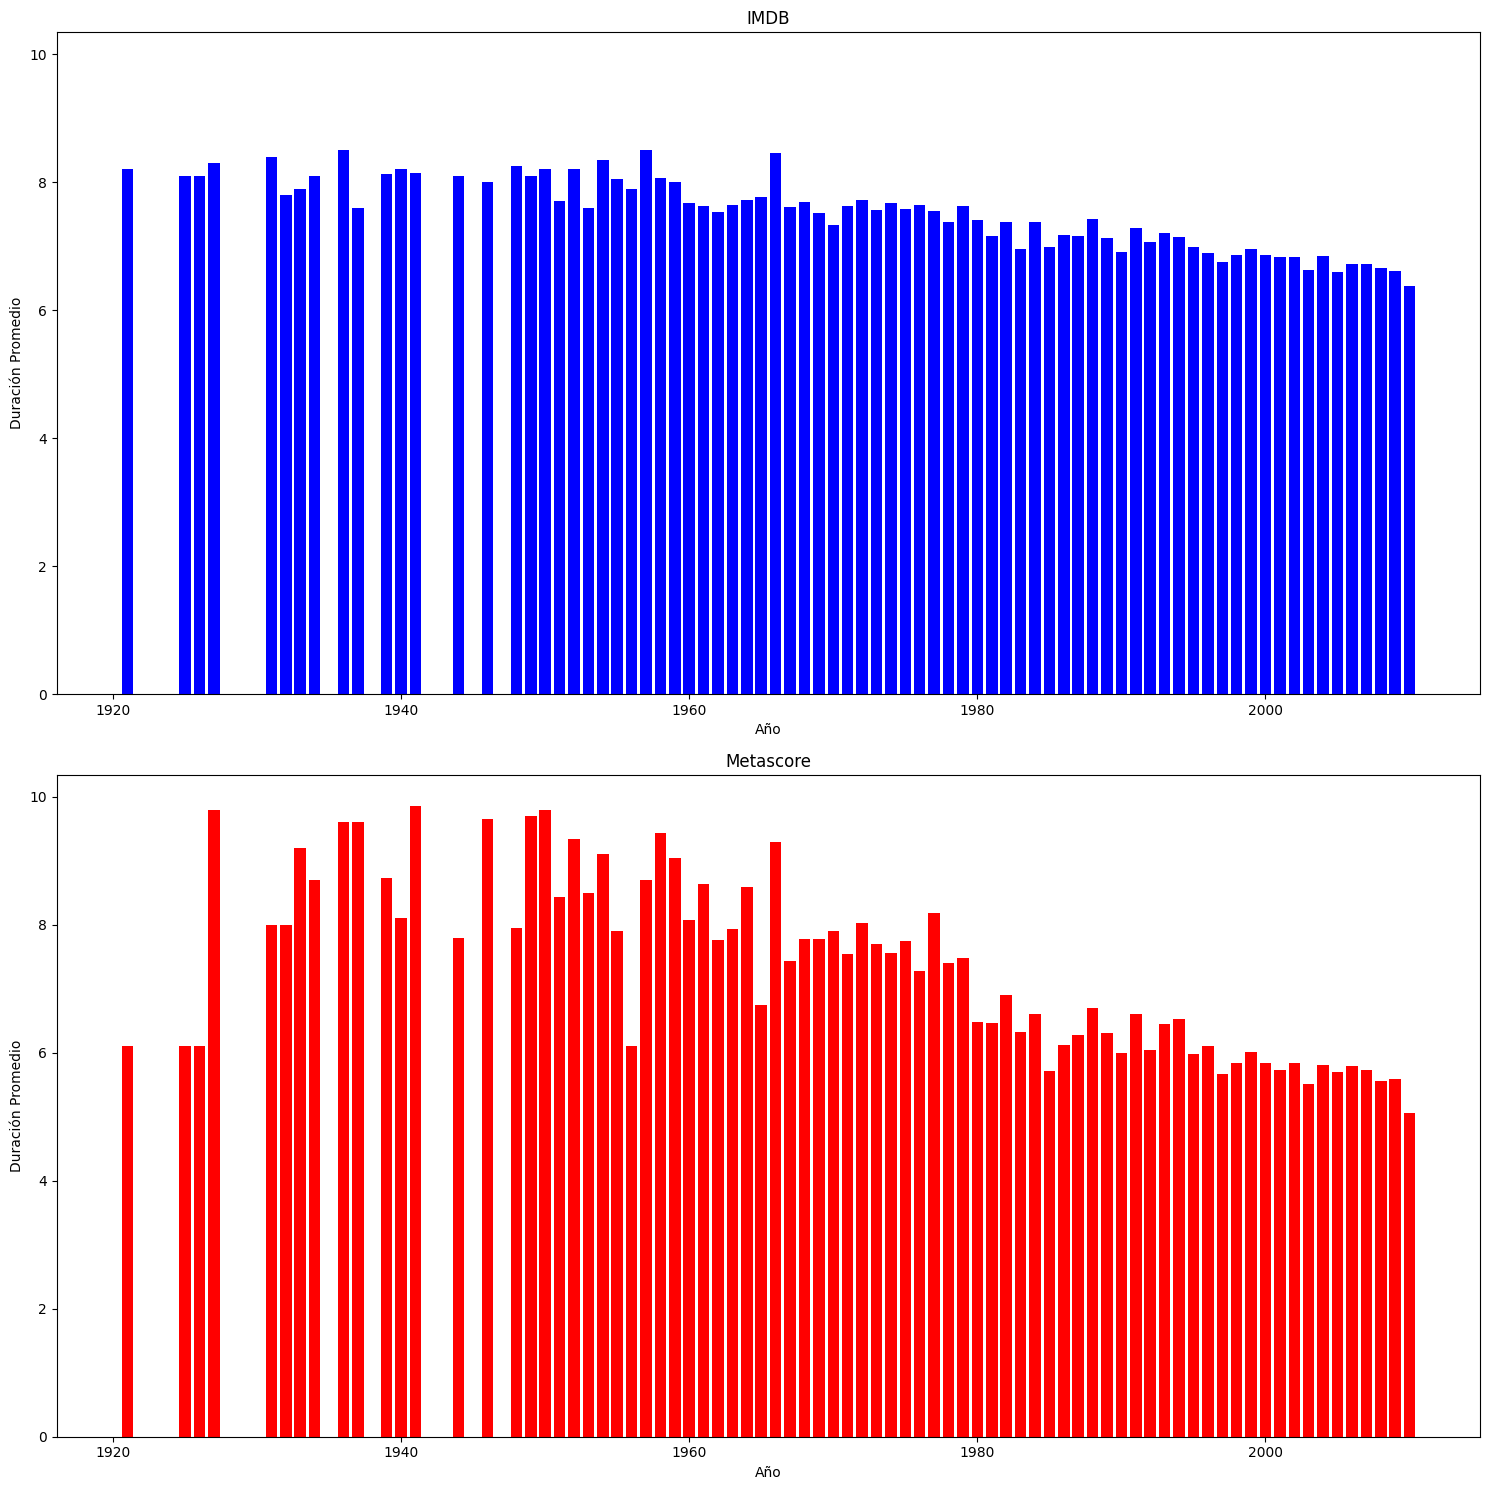

In [559]:
# IMDB Rating era de tipo object por lo que se transformó a float
df["IMDB Rating"] = df["IMDB Rating"].astype(float)

# Crear la figura y los subgráficos
fig, axs = plt.subplots(2, 1, figsize=(15, 15), sharey=True)

# Subgráfico para la época antigua
antiguo_avg_duration = df.groupby("Release Year")["IMDB Rating"].mean()
axs[0].bar(antiguo_avg_duration.index, antiguo_avg_duration.values, color='blue')
axs[0].set_title('IMDB')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Puntuación Promedio')

# Subgráfico para la época retro
retro_avg_duration = df.groupby("Release Year")["Metascore"].mean()
axs[1].bar(retro_avg_duration.index, retro_avg_duration.values, color='red')
axs[1].set_title('Metascore')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Puntuación Promedio')

# Mostrar gráfico
plt.tight_layout()
plt.show()